In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dipam7/student-grade-prediction")

print("Path to dataset files:", path)
!ls {path}

/home/vlad/Programs/Programs/Git/ML_LAB/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 7.16k/7.16k [00:00<00:00, 18.0MB/s]

Extracting files...
Path to dataset files: /home/vlad/.cache/kagglehub/datasets/dipam7/student-grade-prediction/versions/1
student-mat.csv


In [3]:
import pandas as pd
data = pd.read_csv(path+"/student-mat.csv")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


Attribute Information:

school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex - student's sex (binary: 'F' - female or 'M' - male)

age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: 'U' - urban or 'R' - rural)

famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian - student's guardian (nominal: 'mother', 'father' or 'other')

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)




In [4]:
# получим информацию о признаках
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
# получим описательную статистику по численным признакам данных
# это датасет об учашхся, целевой признак который нам важен - это G1, G2, G3
# это средние оценки за первый, второй и итоговый периоды обучения
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
print("Уникальные значения нечисловых прихзнаков")
column_uniques = {}
for c in data.columns:
    col = data[c]
    if col.dtype=='object':
        column_uniques[c] = col.unique()
        print(f"{c}:\n{column_uniques[c]}")

Уникальные значения нечисловых прихзнаков
school:
['GP' 'MS']
sex:
['F' 'M']
address:
['U' 'R']
famsize:
['GT3' 'LE3']
Pstatus:
['A' 'T']
Mjob:
['at_home' 'health' 'other' 'services' 'teacher']
Fjob:
['teacher' 'other' 'services' 'health' 'at_home']
reason:
['course' 'other' 'home' 'reputation']
guardian:
['mother' 'father' 'other']
schoolsup:
['yes' 'no']
famsup:
['no' 'yes']
paid:
['no' 'yes']
activities:
['no' 'yes']
nursery:
['yes' 'no']
higher:
['yes' 'no']
internet:
['no' 'yes']
romantic:
['no' 'yes']


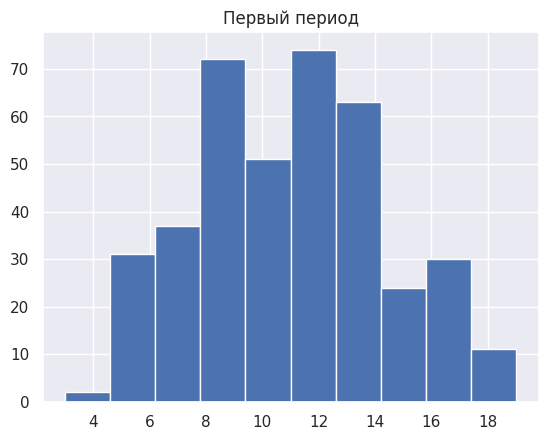

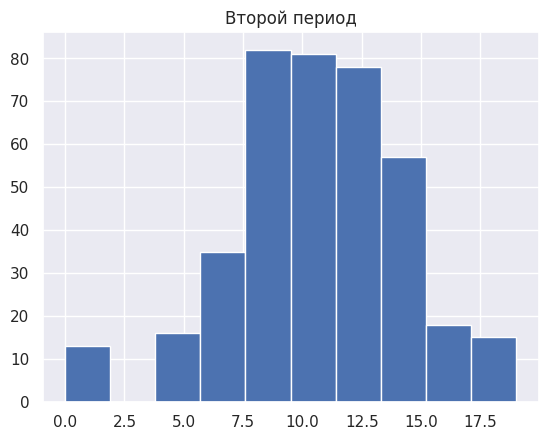

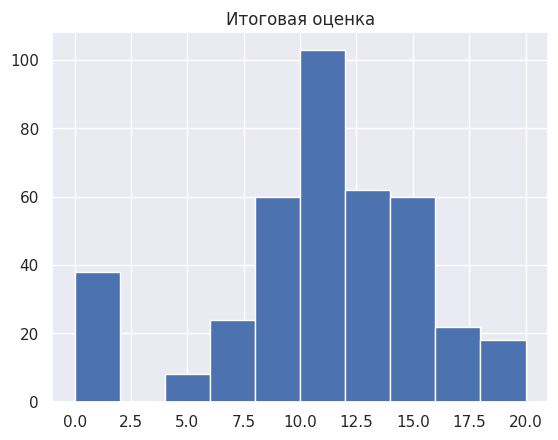

In [7]:
# отрисуем оценки за пероды обучения
plt.title("Первый период")
plt.hist(data['G1'])
plt.show()

plt.title("Второй период")
plt.hist(data['G2'])
plt.show()

plt.title("Итоговая оценка")
plt.hist(data['G3'])
plt.show()

In [8]:
# чтоб упростить визуализацию, сделаем G_
data["G3_group"] = pd.cut(x=data['G3'], bins=[0,5,10,15,20])

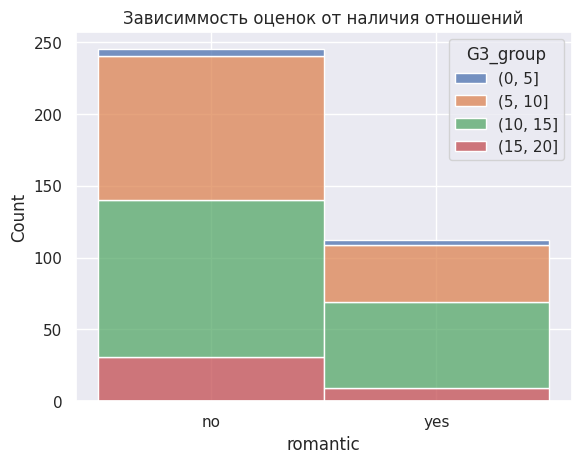

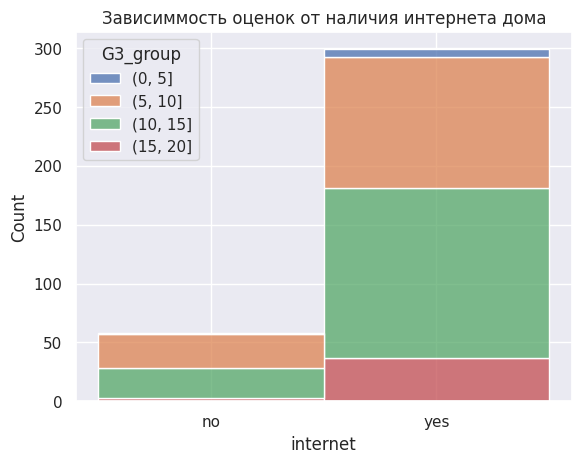

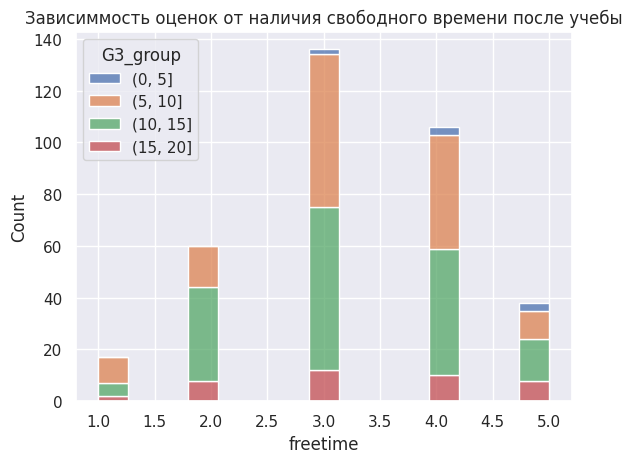

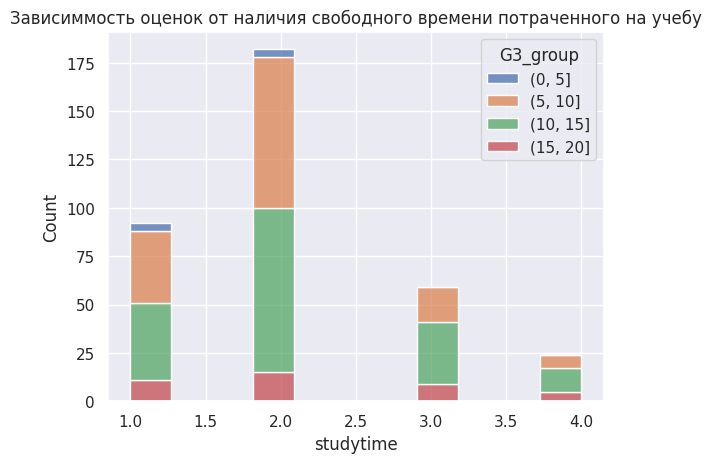

In [9]:
# Сильного влияния не оказывает
# plot_normalized_countplot(data=data, x="romantic", hue='G3_group',)
sns.histplot(data, x="romantic", hue="G3_group", multiple="stack")
plt.title("Зависиммость оценок от наличия отношений")
plt.show()

# А тем, у кого нет дома интернета, невозможно вообще нормально учиться! Группа оценок смещена влево!
sns.histplot(data, x="internet", hue="G3_group", multiple="stack")
plt.title("Зависиммость оценок от наличия интернета дома")
plt.show()

# Чем больше свободного времени после учебы, тем, как правило лучше учится студент
sns.histplot(data, x="freetime", hue="G3_group", multiple="stack")
plt.title("Зависиммость оценок от наличия свободного времени после учебы")
plt.show()

# Чем больше времени потрачено на учебу, тем, как правило лучше учится студент
sns.histplot(data, x="studytime", hue="G3_group", multiple="stack")
plt.title("Зависиммость оценок от наличия свободного времени потраченного на учебу")
plt.show()



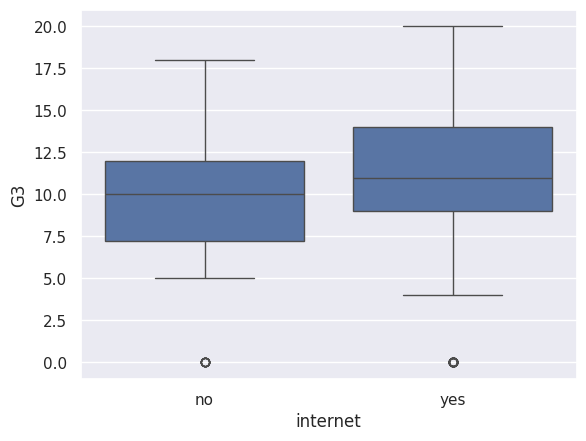

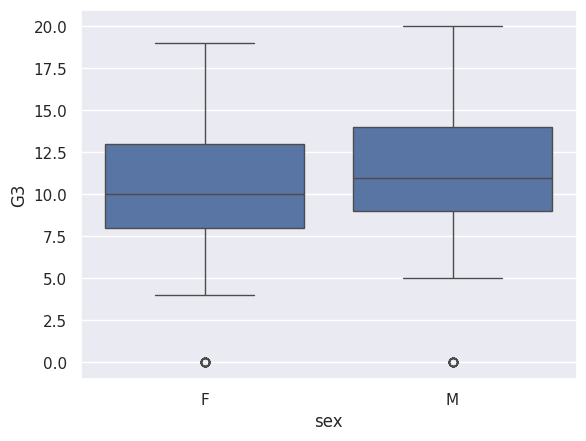

In [10]:
sns.boxplot(data=data, x='internet', y='G3')
plt.show()

#мальчики учаться чуть лучше
sns.boxplot(data=data, x='sex', y='G3')
plt.show()


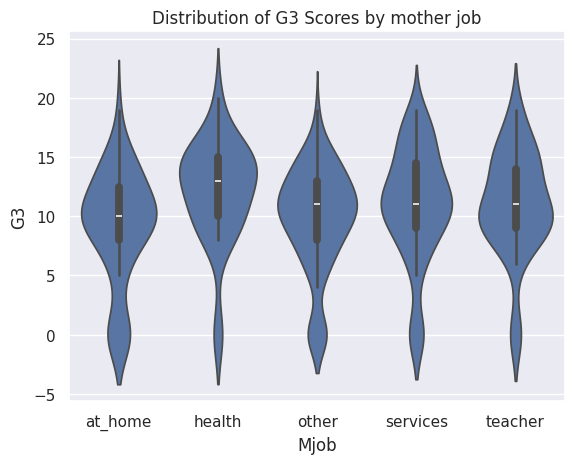

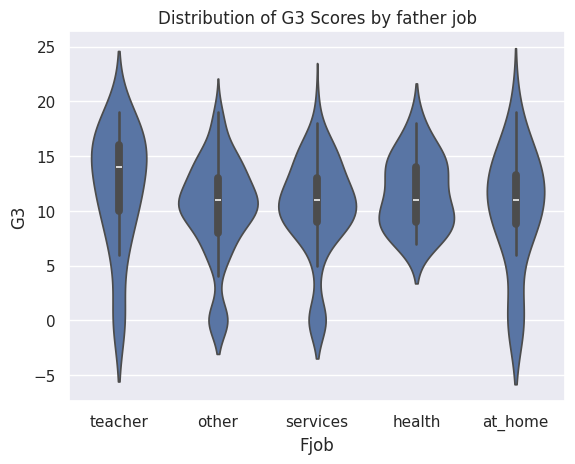

In [11]:
# when mother is working in health student is doing better
sns.violinplot(data=data, x='Mjob', y='G3')
plt.title("Distribution of G3 Scores by mother job")
plt.show()

# when father is teacher student is doing better
sns.violinplot(data=data, x='Fjob', y='G3')
plt.title("Distribution of G3 Scores by father job")
plt.show()


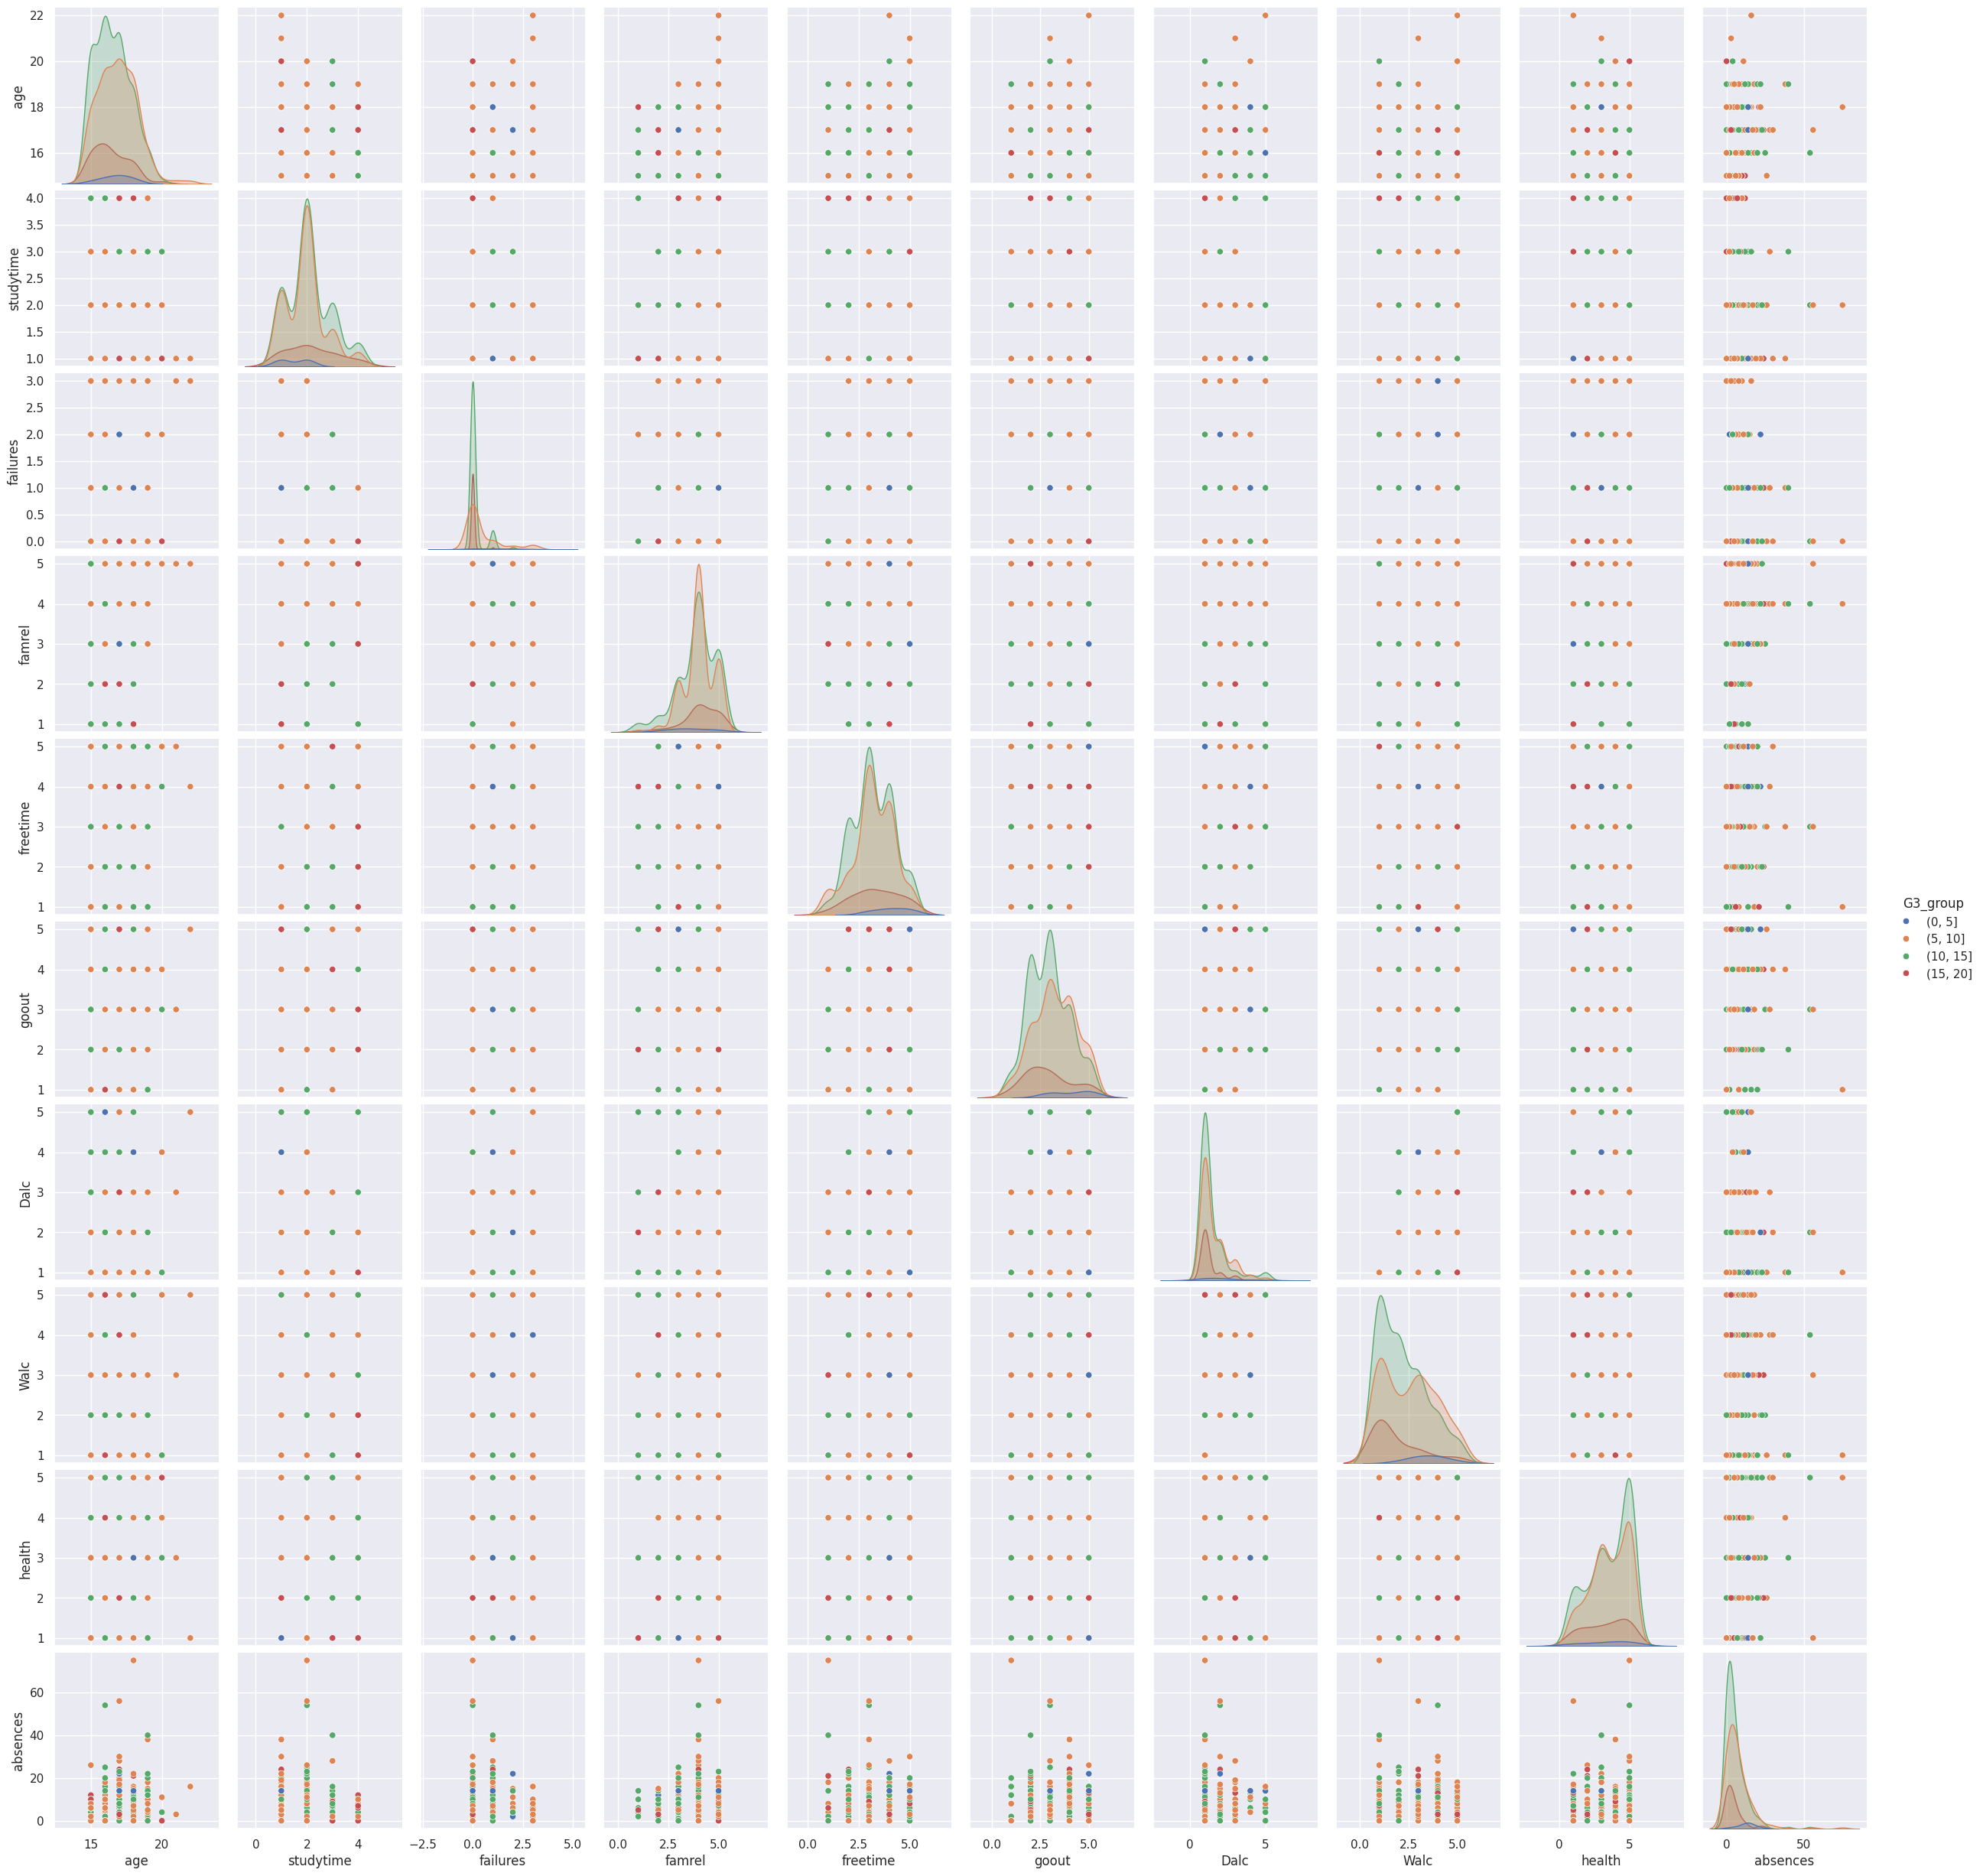

In [12]:
cols = ['school', 'sex', 'age', 'famsize', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3_group']
sns.pairplot(data[cols], kind="scatter", hue="G3_group")

In [13]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
def my_encoder(data):
    """Replaces string data with their one-hot encoded versions"""
    # Check if input is a DataFrame or Series
    if isinstance(data, pd.Series):
        # One-hot encode the Series directly
        return pd.get_dummies(data, prefix=data.name, dtype=float)
    elif isinstance(data, pd.DataFrame):
        # Make a copy of the original dataframe
        df_copy = data.copy()
        # Loop through each column
        for col in df_copy.columns:
            # Check if the column is of type object (text)
            if df_copy[col].dtype != 'object': continue
            unique_vals=df_copy[col].unique()
            
            if len(unique_vals) == 2:
                # Use OrdinalEncoder for binary categorical features
                ordinal_encoder = OrdinalEncoder()  # Create a new instance for each column
                encoded_col = ordinal_encoder.fit_transform(df_copy[col].values.reshape(-1, 1))
                df_copy[col] = encoded_col.flatten()  # Add to encoded data
            else:
                # Create one-hot encoding for the column
                dummies = pd.get_dummies(df_copy[col], prefix=col, dtype=float)
                # Insert the dummies columns right after the original column
                df_copy = pd.concat([df_copy.iloc[:, :df_copy.columns.get_loc(col) + 1], dummies, df_copy.iloc[:, df_copy.columns.get_loc(col) + 1:]], axis=1)
                # Drop the original column
                df_copy = df_copy.drop(col, axis=1)
        return df_copy
    else:
        raise ValueError("Input must be a pandas DataFrame or Series")

In [14]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import pandas as pd

print("Заменим нечисловые признаки")
encoded_data = one_hot_encode(data)
encoded_data

Заменим нечисловые признаки


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob_at_home,Mjob_health,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G3_group
0,0.0,0.0,18,1.0,0.0,0.0,4,4,1.0,0.0,...,3,4,1,1,3,6,5,6,6,"(5, 10]"
1,0.0,0.0,17,1.0,0.0,1.0,1,1,1.0,0.0,...,3,3,1,1,3,4,5,5,6,"(5, 10]"
2,0.0,0.0,15,1.0,1.0,1.0,1,1,1.0,0.0,...,3,2,2,3,3,10,7,8,10,"(5, 10]"
3,0.0,0.0,15,1.0,0.0,1.0,4,2,0.0,1.0,...,2,2,1,1,5,2,15,14,15,"(10, 15]"
4,0.0,0.0,16,1.0,0.0,1.0,3,3,0.0,0.0,...,3,2,1,2,5,4,6,10,10,"(5, 10]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.0,1.0,20,1.0,1.0,0.0,2,2,0.0,0.0,...,5,4,4,5,4,11,9,9,9,"(5, 10]"
391,1.0,1.0,17,1.0,1.0,1.0,3,1,0.0,0.0,...,4,5,3,4,2,3,14,16,16,"(15, 20]"
392,1.0,1.0,21,0.0,0.0,1.0,1,1,0.0,0.0,...,5,3,3,3,3,3,10,8,7,"(5, 10]"
393,1.0,1.0,18,0.0,1.0,1.0,3,2,0.0,0.0,...,4,1,3,4,5,0,11,12,10,"(5, 10]"


<Axes: >

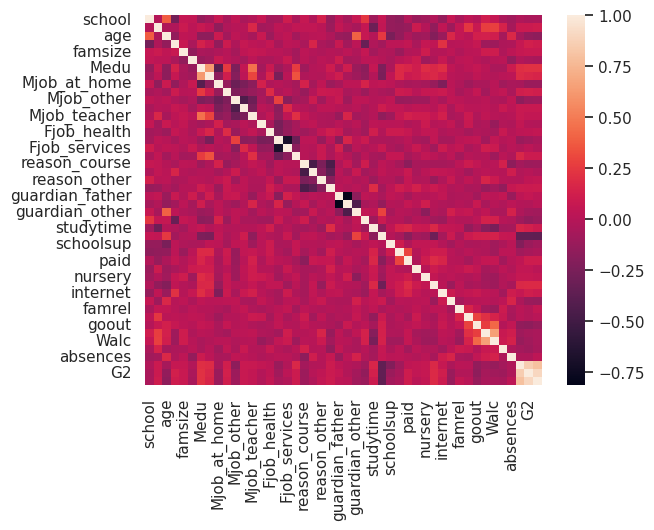

In [15]:
sns.heatmap(encoded_data.corr(numeric_only = True))

Мы провели анализ данных.

Мак